<a href="https://colab.research.google.com/github/JuanM-GG/sistemas-dinamicos-Python/blob/main/MONOD_FED_BATCH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Título: 

Autor: 

Fecha: 

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [112]:
def model(s, t, F):

    # state variables 
    V = s[0]
    x = s[1]
    s = s[2]

    dV = F  # ---> V(t) = F*t

    dx = mu*s/(s + k + ki*s**2)*x - (F/V)*x

    ds = -(1/Y)*mu*s/(s+k + ki*s**2)*x + (F/V)*(sf -s)

    return [dV, dx, ds]

In [159]:
# parameters values 
F = 0.5 # <------------
mu = 2.1
ki = 0.3
k = 180
Y = 0.2
sf = 100 # <------------

In [160]:
# integration time 
t = np.linspace(0,80,100)

In [161]:
# initial states 
s = [20 ,1, 40]

In [162]:
out = odeint(model, s, t, args= (F,))

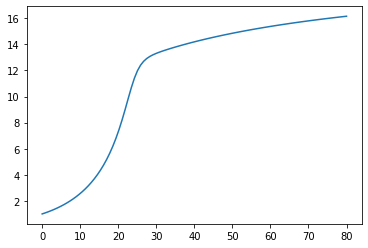

In [163]:
plt.plot(t, out[:,1])

$$
\hat{F} \rightarrow f(F) \rightarrow \hat{x}_{end}
$$

In [164]:
def end_biomass(model, s, t, F):

    out = odeint(model, s, t, args = (F, ))

    n = len(out[:,1])
    
    x_end = out[n-1,1]

    return x_end

In [165]:
end_biomass(model, s, t, 0.1)

12.040467694231266

In [166]:
def end_biomass2(model, s, t, F):

    out = np.zeros(len(F))

    for i in range(len(F)):
        
        out[i] = end_biomass(model, s, t, F[i])
    
    return out

In [170]:
F = np.linspace(0,10,100)

In [171]:
x_end = end_biomass2(model, s, t, F)

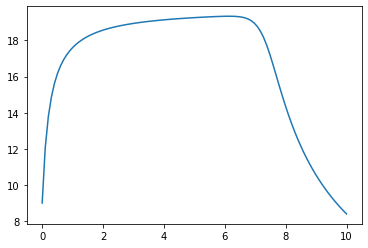

In [172]:
plt.plot(F, x_end)

0.0